In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
data = pd.read_csv(r'P:\all_course\arc\heart.csv')

In [13]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#to check for null values
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
# to check the datatype
df = data.dtypes
print(df)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


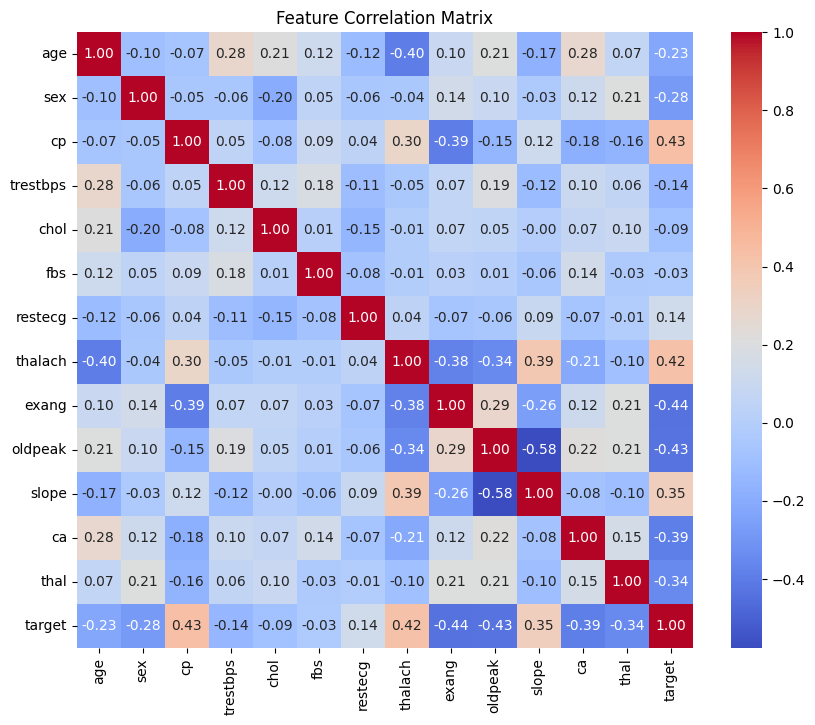

In [20]:
# 2.Data selection
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.show()



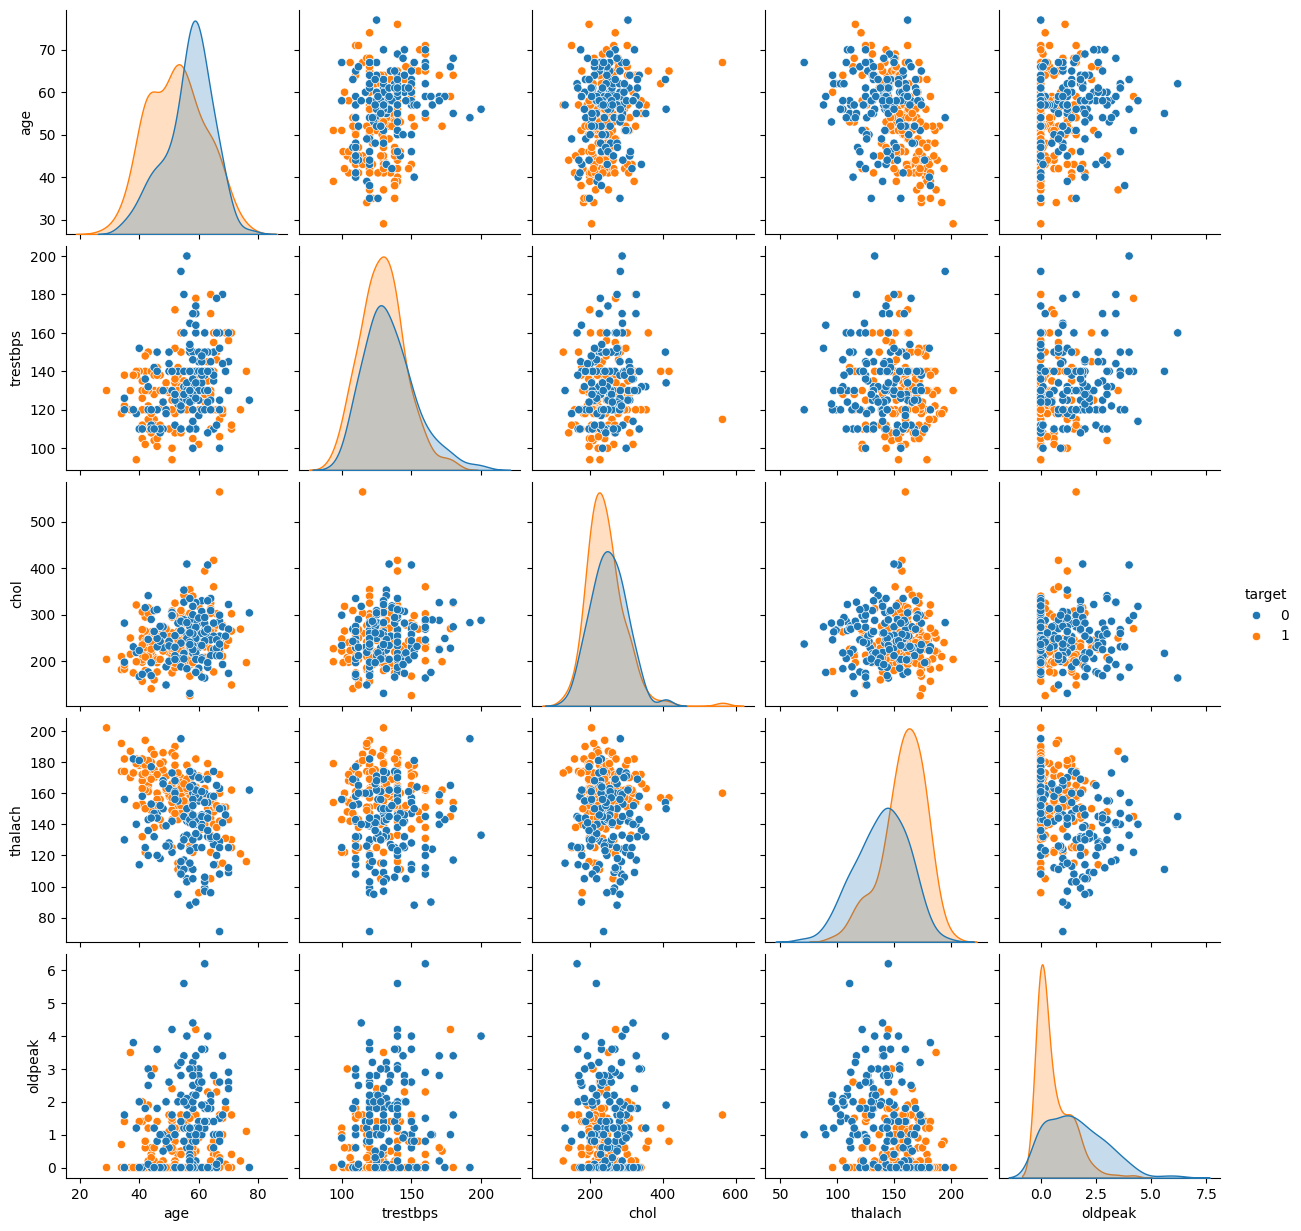

In [25]:
sns.pairplot(data, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue='target')
plt.show()

In [28]:
numeric_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

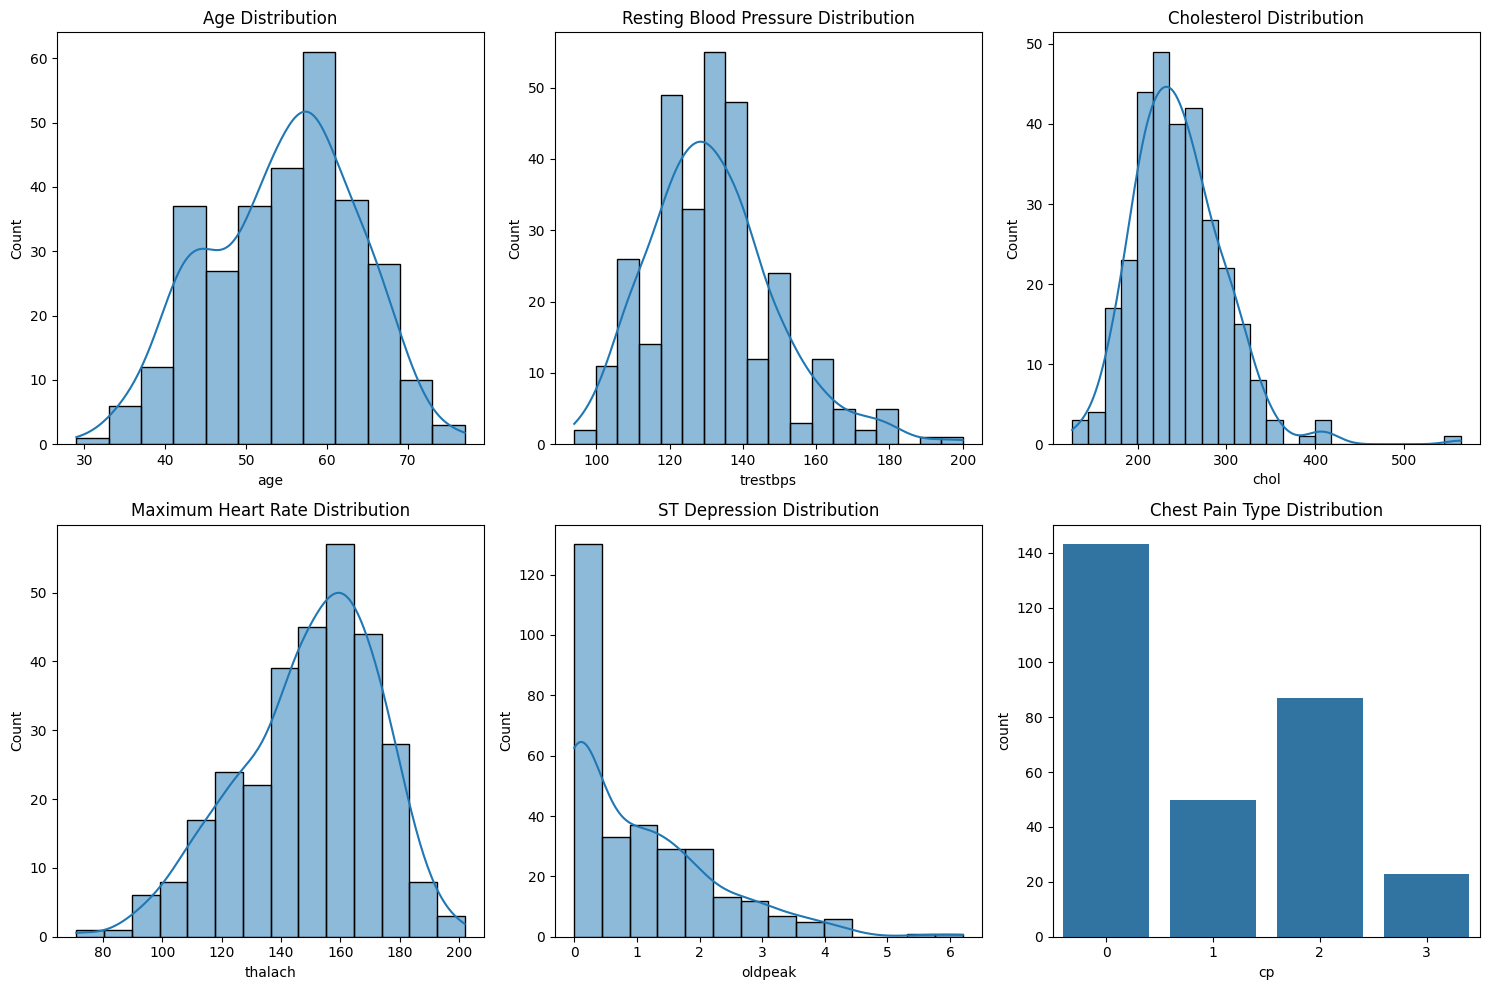

In [35]:
# Individual plots for key features
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Age Distribution
sns.histplot(data['age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

# Resting Blood Pressure
sns.histplot(data['trestbps'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Resting Blood Pressure Distribution')

# Cholesterol
sns.histplot(data['chol'], kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Cholesterol Distribution')

# Maximum Heart Rate Achieved
sns.histplot(data['thalach'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Maximum Heart Rate Distribution')

# ST Depression
sns.histplot(data['oldpeak'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('ST Depression Distribution')

#chest pain distribution
sns.countplot(x='cp', data=data, ax=axs[1, 2])
axs[1, 2].set_title('Chest Pain Type Distribution')

plt.tight_layout()
plt.show()

In [44]:
X = data.drop(columns='target')
y = data['target']

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Initialize the StandardScaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

C:\Users\prema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(f"Confusion Matrix (Logistic Regression):\n{conf_matrix_logreg}")
print(f"Classification Report (Logistic Regression):\n{class_report_logreg}")

Logistic Regression Accuracy: 0.8131868131868132
Confusion Matrix (Logistic Regression):
[[32  9]
 [ 8 42]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [48]:
# Random Forest Classifier Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [49]:
# Evaluation of Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Confusion Matrix (Random Forest):\n{conf_matrix_rf}")
print(f"Classification Report (Random Forest):\n{class_report_rf}")

Random Forest Accuracy: 0.8351648351648352
Confusion Matrix (Random Forest):
[[33  8]
 [ 7 43]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



In [52]:
#Naive Bayes
nb = GaussianNB()
# Train the classifier on the training data
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [53]:
# Predict on the test set
y_pred = nb.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [54]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8351648351648352
Confusion Matrix:
[[36  5]
 [10 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



In [56]:
# SVM
# Initialize SVM classifier
svm = SVC(kernel='rbf', random_state=42)

In [57]:
# Train the SVM classifier
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test_scaled)


In [58]:
# Evaluate the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print evaluation results
print(f"SVM Accuracy: {accuracy_svm}")
print(f"Confusion Matrix (SVM):\n{conf_matrix_svm}")
print(f"Classification Report (SVM):\n{class_report_svm}")

SVM Accuracy: 0.8241758241758241
Confusion Matrix (SVM):
[[33  8]
 [ 8 42]]
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

